In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [3]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

1837912918.npz
(300, 64, 64, 3)


In [15]:
import sys
!{sys.executable} -m pip install pydot

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'


In [16]:
import sys
!{sys.executable} -m pip install graphviz

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'


In [21]:
import sys
!{sys.executable} -m pip install pydot_ng

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'


In [23]:
import sys
!{sys.executable} -m pip install plot_model

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'


In [24]:
## this just shows the VAE model flow, I don't think its important for our reporting
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


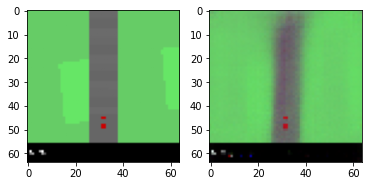

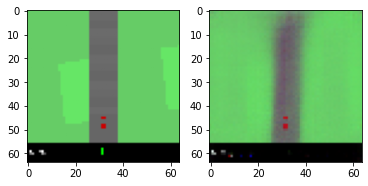

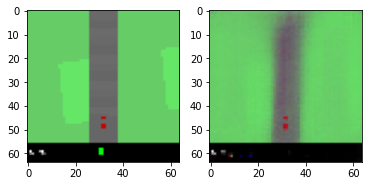

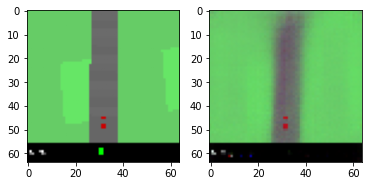

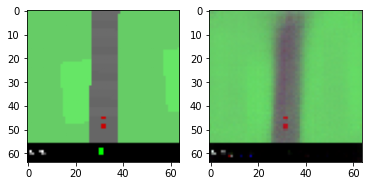

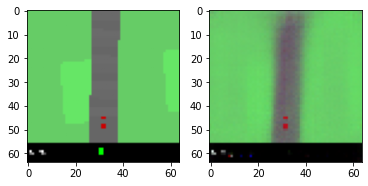

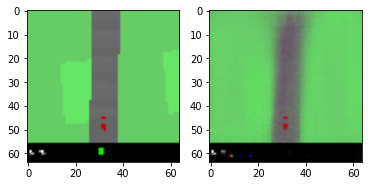

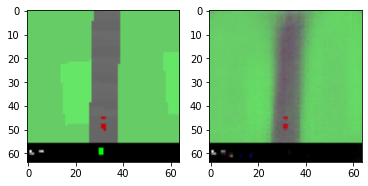

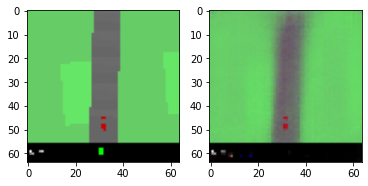

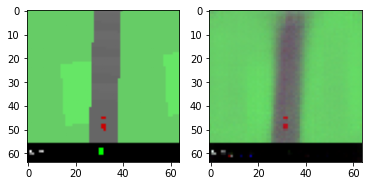

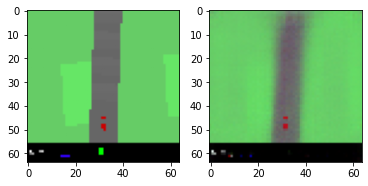

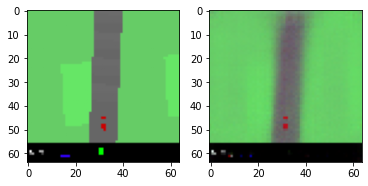

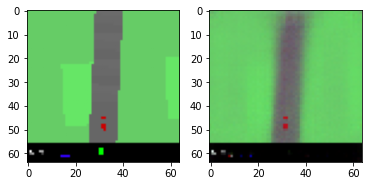

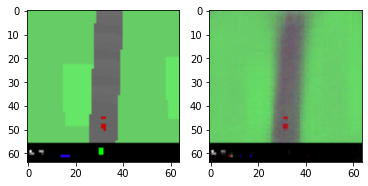

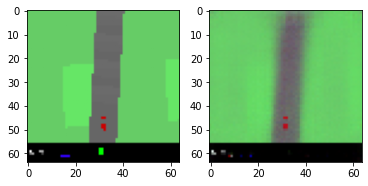

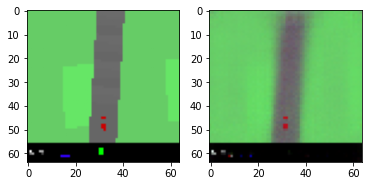

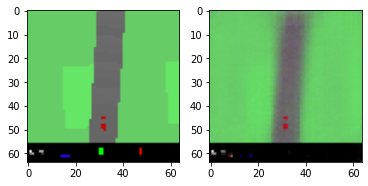

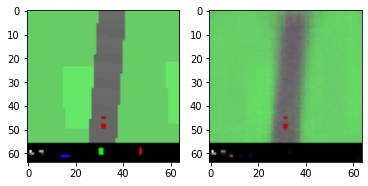

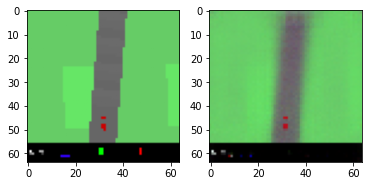

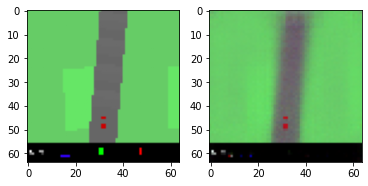

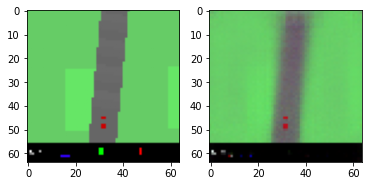

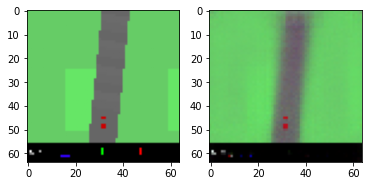

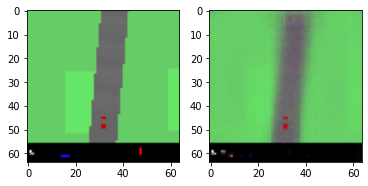

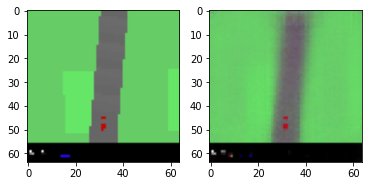

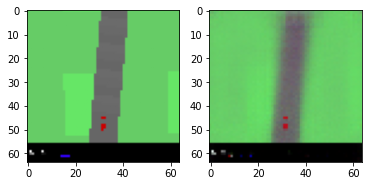

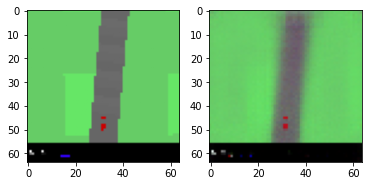

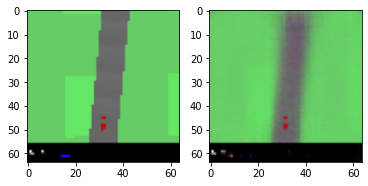

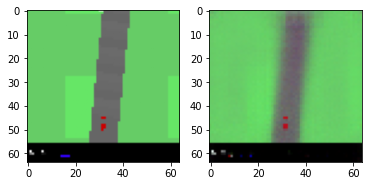

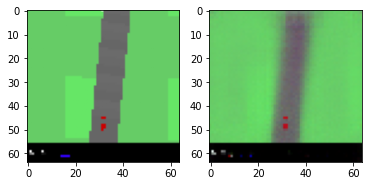

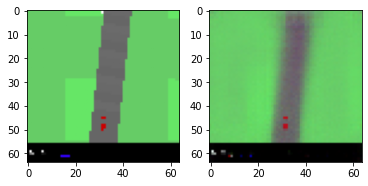

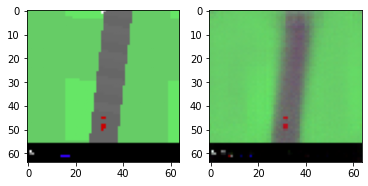

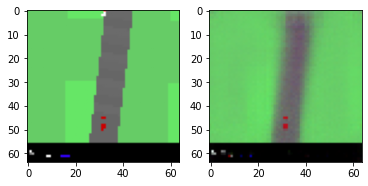

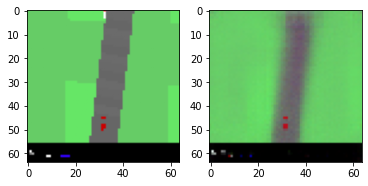

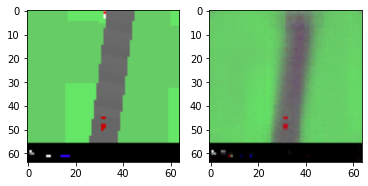

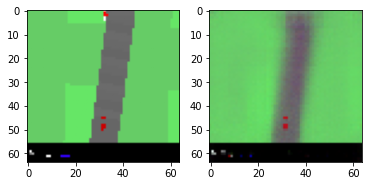

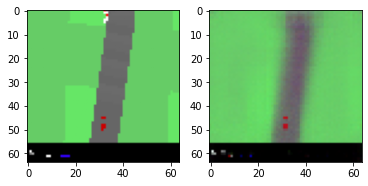

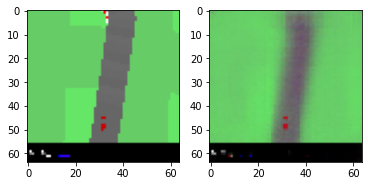

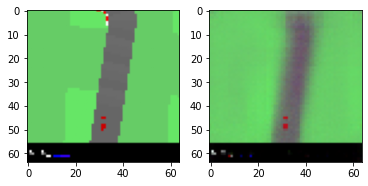

KeyboardInterrupt: 

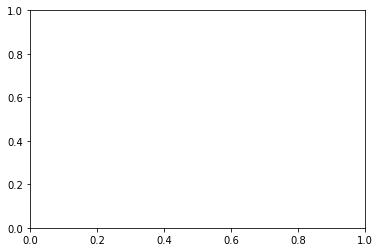

In [25]:
### output from one episode

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
    plt.show()
#     display.clear_output(wait=True)
#     display.display(plt.gcf()) 

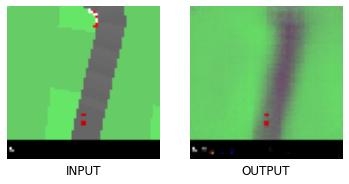

In [26]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [27]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [-0.1121 -0.2584  0.4938  0.1431 -0.9183 -0.0042  0.4095  0.0244 -0.3206
  0.1139 -0.0981  0.2037 -0.053  -0.5028  2.1726 -0.3916  0.1753  0.5778
  0.5836 -0.1713 -0.0079  0.5872  0.3434 -0.0501 -0.3563 -0.1525 -0.0917
  0.0668 -0.1872  0.0701  0.0102  0.2366]
log_var = [-0.0321 -0.1032 -0.6946 -0.142  -2.7582 -0.0659 -3.8613 -0.1658 -0.5725
 -0.219  -0.3087 -0.3102 -0.1518 -0.7692 -2.9641 -0.2579 -0.0652 -0.8458
 -0.4864 -0.0783 -3.018  -0.2282 -0.167  -0.5692 -2.0059 -0.093  -0.0435
 -0.0111 -0.1992 -0.0892 -0.1427 -0.2027]
z = [[-0.1121 -0.2584  0.4938  0.1431 -0.9183 -0.0042  0.4095  0.0244 -0.3206
   0.1139 -0.0981  0.2037 -0.053  -0.5028  2.1726 -0.3916  0.1753  0.5778
   0.5836 -0.1713 -0.0079  0.5872  0.3434 -0.0501 -0.3563 -0.1525 -0.0917
   0.0668 -0.1872  0.0701  0.0102  0.2366]]


informative dimensions:


array([ 2,  4,  6,  8, 13, 14, 17, 20, 23, 24])

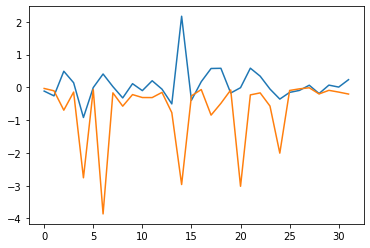

In [28]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [29]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [30]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[ 0.0328,  0.0342, -0.3662, -0.1373, -0.6045,  0.0114,  0.5457,
          0.2481,  0.2295, -0.1962, -0.2235, -0.2042, -0.1719,  0.0046,
          1.5415,  0.3157, -0.0214, -0.0942, -0.3041,  0.0011, -1.3212,
         -0.1526,  0.1968,  0.409 ,  0.5826, -0.0018,  0.1068, -0.0025,
          0.1542, -0.2019, -0.1102, -0.1363]], dtype=float32),
 array([[-0.0585, -0.1296, -0.5979, -0.0695, -2.6386, -0.0282, -3.7642,
         -0.1026, -0.4725, -0.0902, -0.2337, -0.1802, -0.0621, -0.6462,
         -2.8826, -0.1763, -0.1453, -0.6561, -0.3456, -0.1204, -2.7248,
         -0.1617, -0.2299, -0.4085, -1.5054, -0.0926, -0.0558,  0.0104,
         -0.0417, -0.0983,  0.0118, -0.1504]], dtype=float32),
 array([[-0.6242, -0.7312, -0.9378,  1.8598, -1.026 , -1.4577,  0.4156,
         -0.1012,  2.1002, -0.3528, -1.3297,  0.008 , -0.9555,  0.3652,
          1.137 , -0.485 ,  3.5035, -0.0175, -1.5739, -0.2786, -1.4292,
         -0.1658,  0.9263, -0.205 ,  0.4485,  0.2136,  0.014 , -0.5242,
          

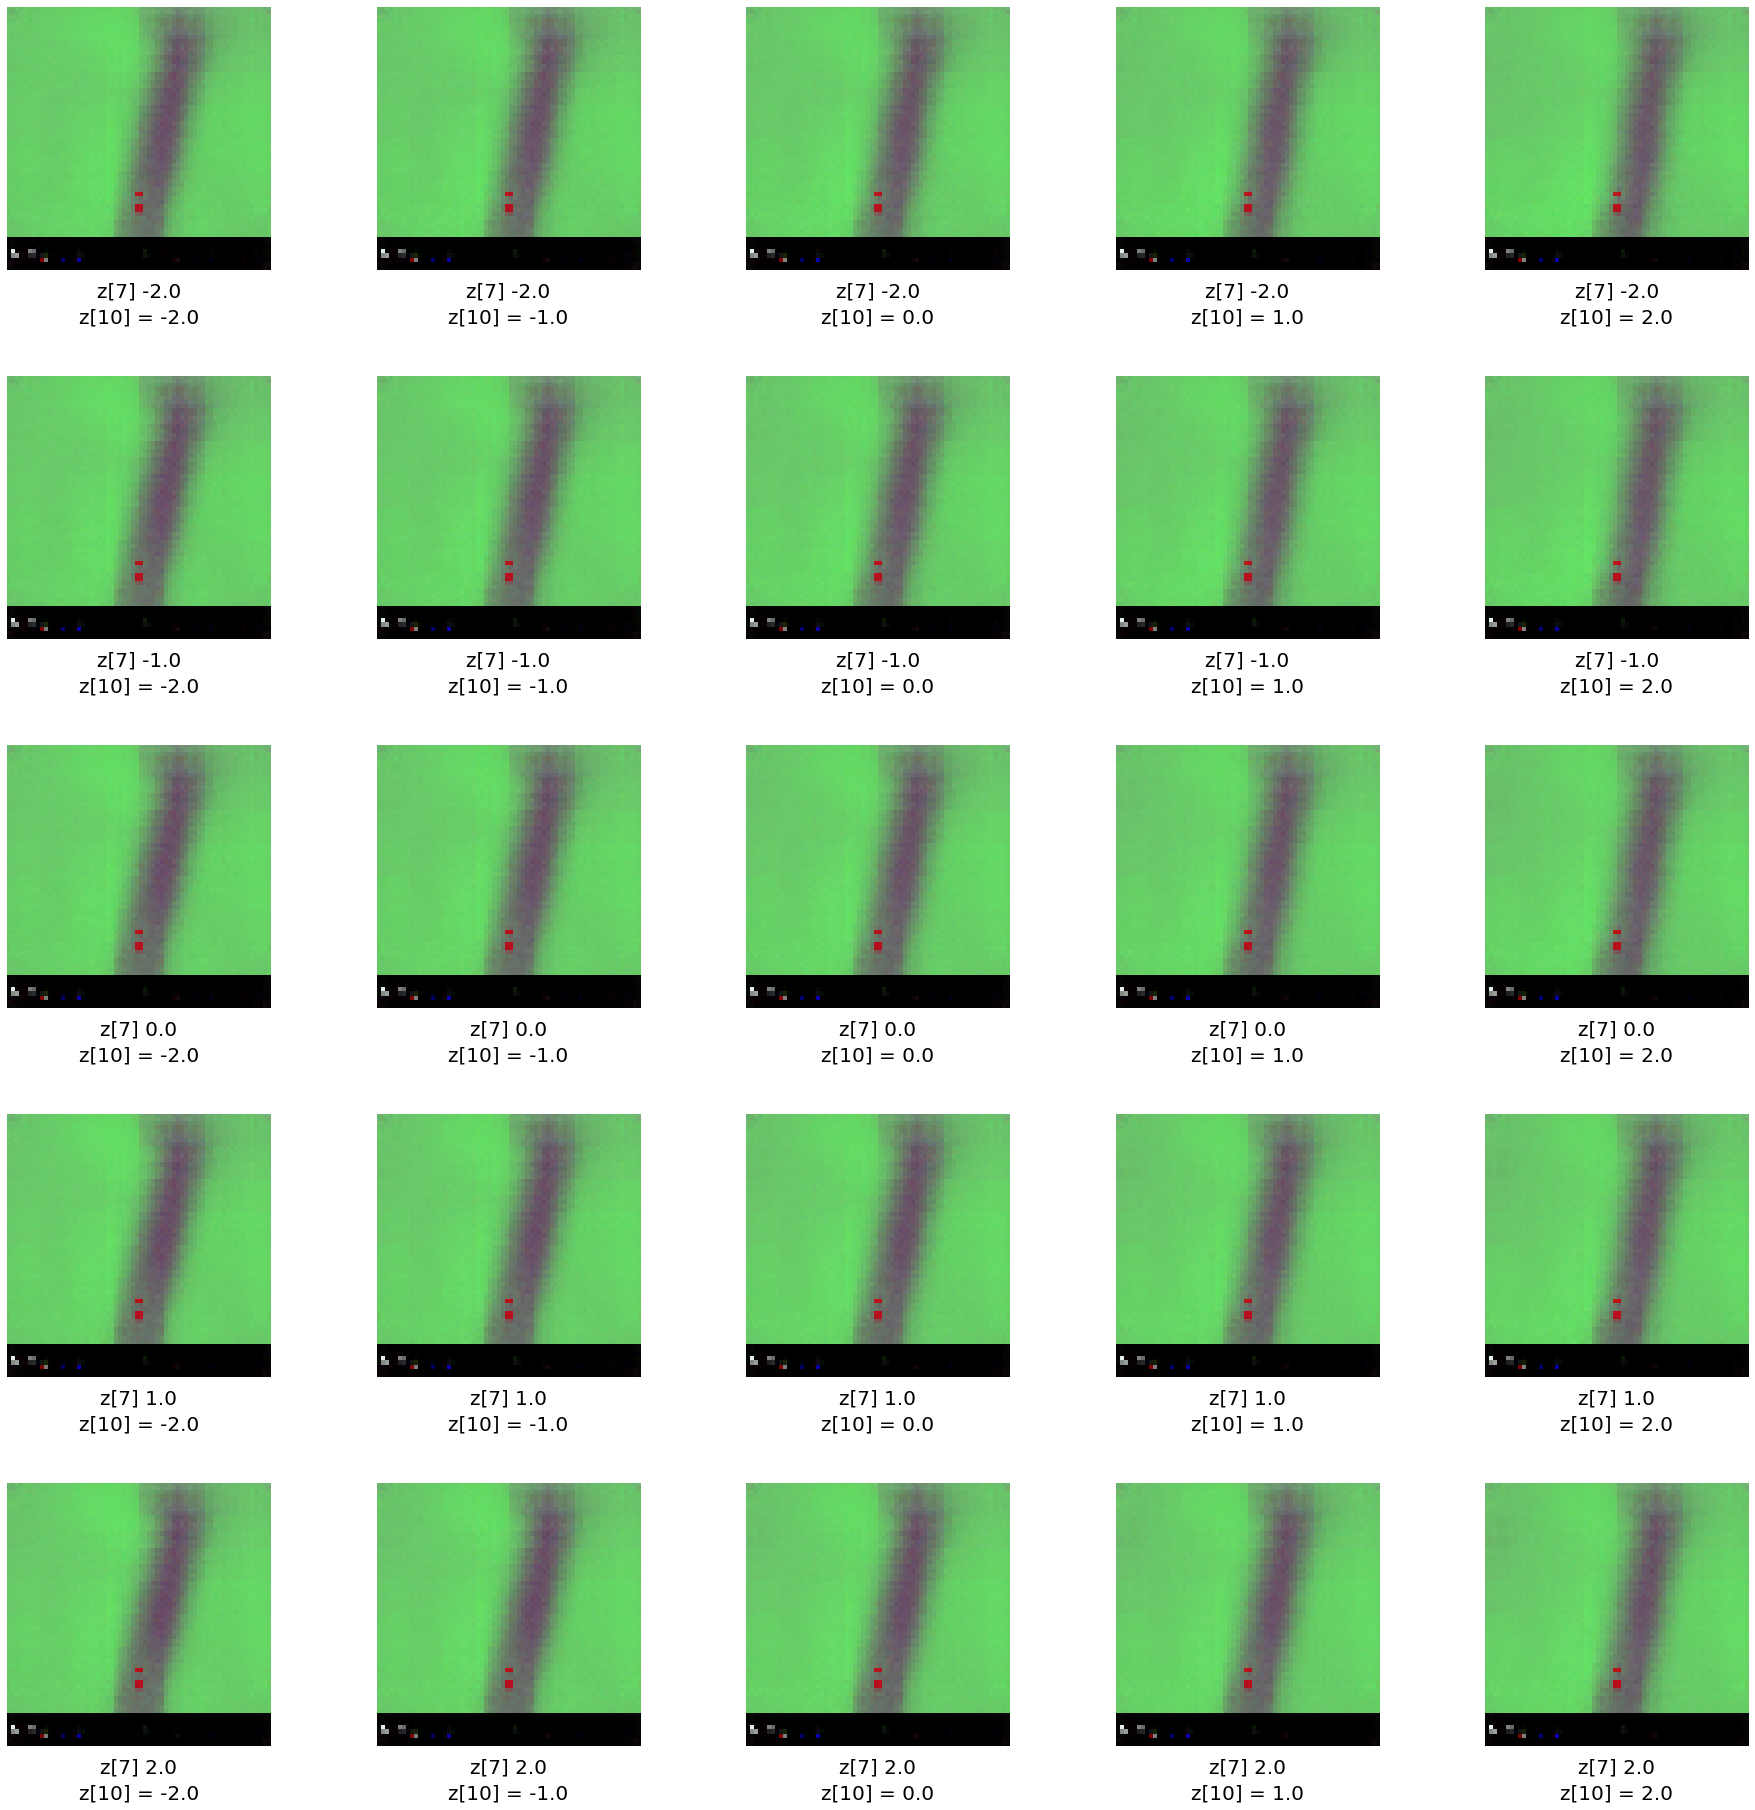

In [31]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [ ]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [ ]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )